In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### merging 12 months of csv sales data into a single file


In [2]:
files = os.listdir("./Sales_Data/")


df = pd.DataFrame()
print(df.shape)
# df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

for file in files:
    new_df = pd.read_csv(f"./Sales_Data/{file}")
    df = pd.concat([df, new_df])
print(df.shape)
df.to_csv("all_data.csv")


(0, 0)
(186850, 6)


### import csv containing all data


In [3]:
all_data = pd.read_csv("./all_data.csv")
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


##### Task 1: clean data


In [4]:
all_data.head()

# get all NAN rows
all_data = all_data.dropna(axis="index").reset_index()
all_data.shape
print(all_data.isna().sum())
print(all_data.isnull().sum())


index               0
Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64
index               0
Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


In [5]:
# find 'Or' and delete it
all_data = all_data[(all_data["Order Date"].str[0:2]) != "Or"].reset_index()

##### Task 2: add a month column


In [6]:
# remove column from a dataframe
all_data = all_data.drop(columns=["Unnamed: 0", "level_0", "index"])
all_data["Month"] = all_data["Order Date"].str[0:2].astype("int32")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


##### Task 3: Add a sale column


In [7]:
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])


all_data["sales"] = all_data["Price Each"] * all_data["Quantity Ordered"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


##### Task 4: Add a city column

In [8]:
# all_data[['street','city','state']]=all_data['Purchase Address'].str.split(',')
# all_data['city']=all_data['city'].str.strip()
# all_data=all_data.drop(columns=['street','state'])
# all_data=all_data.drop(columns=['city'])
# all_data

# Alternate way to do it without creating extra columns:
# all_data["city"] = all_data["Purchase Address"].str.split(",").str.get(1).str.strip()
# all_data

# def getAddress(string,split_index):


split_address = all_data["Purchase Address"].str.split(",")
city = split_address.str.get(1).str.strip()
state = split_address.str.get(2).str.strip().str.split().str.get(0)
all_data["city"] = city.astype("str") + " " + state
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA
185946,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA
185947,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA
185948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA


##### Question 1: What was the best month for sales? How much was earned that month?


In [9]:
results = all_data.groupby("Month").sum()
results

,Quantity Ordered,Price Each,sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


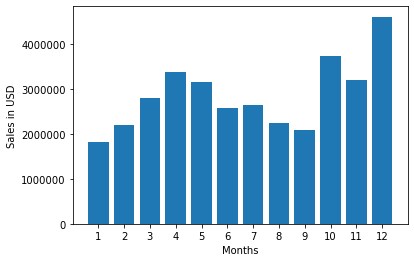

In [10]:
months = range(1, 13)
plt.bar(months, results["sales"])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.ticklabel_format(style='plain')
plt.show()

##### Question 2: What city had the highest number of sales 

Text(0, 0.5, 'Sales in USD')

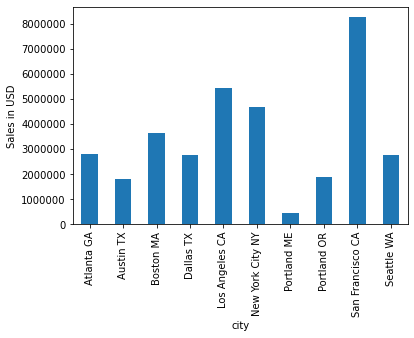

In [11]:
highest_city_sales = all_data.groupby("city")["sales"].sum()
ax = highest_city_sales.plot.bar()
ax.ticklabel_format(axis="y", style="plain")
ax.set_ylabel('Sales in USD')

##### Question 3: What time should we display ads to maximize the likelihood of customers buying product?

In [12]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA
185946,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA
185947,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA
185948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA


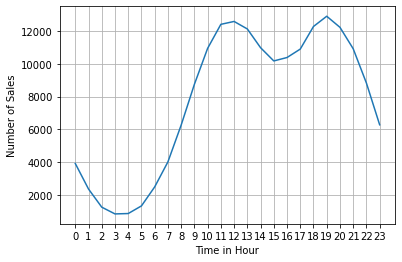

In [13]:
all_data["hour"] = all_data["Order Date"].dt.hour


highest_time_sales = all_data.groupby("hour")["sales"].count()

plt.plot(highest_time_sales)
plt.xticks(highest_time_sales.index)
plt.xlabel("Time in Hour")
plt.ylabel("Number of Sales")
plt.ticklabel_format(style="plain")
plt.grid()
plt.show()

##### Question 4: What products are most often sold together?

In [14]:
# https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

# df = all_data[all_data["Order ID"].duplicated(keep=False)]
from itertools import combinations
from collections import Counter


count = Counter()

combo = combinations(["a", "b", "c", "c"], 2)

# for i in combo:
    # print(i)

count.update(Counter(combo))
print(count)

Counter({('a', 'c'): 2, ('b', 'c'): 2, ('a', 'b'): 1, ('c', 'c'): 1})


In [15]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
# get all duplicated values based on Order Id. keep=false gives True for all duplicates
df = all_data[all_data["Order ID"].duplicated(keep=False)]


# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
# group by "Order Id", select Product and then join each product separated by comma
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

# drop duplicated rows based on same Order Id and Grouped columns
df2 = df[["Order ID", "Grouped"]].drop_duplicates()
df2.head()

C:\Users\Mohit\AppData\Local\Temp\ipykernel_15372\2581689132.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [16]:
count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')

    # create combination with 2 selections, add them to counter and then update the counter to get count. 
    count.update(Counter(combinations(row_list, 2)))

# get top 10 most common pair of items
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


##### Question 5: What product sold the most? Why do you think it sold the most?

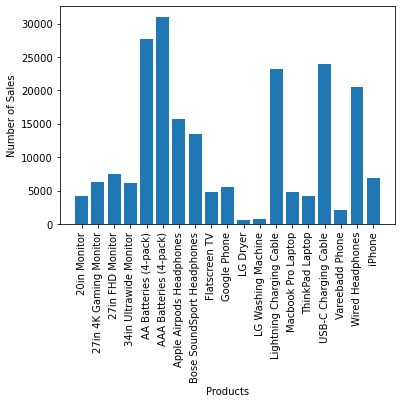

In [17]:
highest_product_sales = all_data.groupby("Product")["Quantity Ordered"].sum()

x = pd.Series(highest_product_sales.index)
plt.bar(x, highest_product_sales)
plt.xticks(rotation="vertical")
plt.xlabel("Products")
plt.ylabel("Number of Sales")
plt.show()

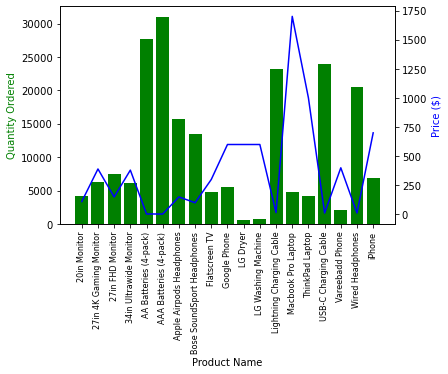

In [18]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, highest_product_sales, color='g')
ax2.plot(x, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticks(x)
ax1.set_xticklabels(x, rotation='vertical', size=8)

plt.show()